In [15]:
import pandas as pd

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('../data/Journalists Killed between 1992 and 2023.csv')

In [18]:
df.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,type,lastStatus,typeOfDeath,status,employedAs,organizations,jobs,coverage,mediums,country,location,region,state,locality,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Al-Shaabiya,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Al-Watan,NaN,NaN,NaN,Iraq,an area southwest of Kirkuk,NaN,NaN,an area southwest of Kirkuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Iraq Media Network,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,Al-Hurra,NaN,NaN,NaN,Iraq,Iskandiriyah,NaN,NaN,Iskandiriyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,Journalist,Killed,Murder,Killed,Staff,"Radio Azadi,Radio Free Europe/Radio Liberty",Producer,"Crime,Politics,War","Radio,Internet",Afghanistan,Kabul,NaN,NaN,Kabul,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loc[df['typeOfDeath'] == 'Unknown', 'typeOfDeath'] = 'Unknown Death'

In [20]:
df['typeOfDeath'].unique()

array([nan, 'Murder', 'Dangerous Assignment', 'Crossfire',
       'Unknown Death'], dtype=object)

In [21]:
df['jobs'] = df['jobs'].str.title()
df['organizations'] = df['organizations'].str.upper()

In [22]:
df_yr_country_group=df[['year','country','fullName']].groupby(['year','country']).count().reset_index()
df_yr_country_group=df_yr_country_group.rename(columns={'fullName':'counts'})
df_yr_country_group

,year,country,counts
0,1992,Algeria,1
1,1992,Angola,1
2,1992,Azerbaijan,1
3,1992,Bosnia,8
4,1992,Chad,3
...,...,...,...
711,2023,Philippines,2
712,2023,Rwanda,1
713,2023,Sudan,1
714,2023,USA,1


In [23]:
df_yr_country_group.to_csv('../data/killed_group_data_yr_country.csv')

# data prep for sankey

In [24]:
df[df['gender'].notna()].head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,type,lastStatus,typeOfDeath,status,employedAs,organizations,jobs,coverage,mediums,country,location,region,state,locality,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,Journalist,Killed,Murder,Killed,Staff,"RADIO AZADI,RADIO FREE EUROPE/RADIO LIBERTY",Producer,"Crime,Politics,War","Radio,Internet",Afghanistan,Kabul,NaN,NaN,Kabul,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,Confirmed,Abay Hailu,NaN,Ethiopia,NaN,NaN,Male,NaN,NaN,Journalist,NaN,Dangerous Assignment,Killed,Staff,AGIERE,Print Reporter,"Human Rights,Politics",Print,Ethiopia,Addis Ababa,NaN,NaN,Addis Ababa,NaN,Local,Government Officials,Confirmed,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,Confirmed,Abd al-Karim al-Ezzo,NaN,Syria,NaN,NaN,Male,NaN,NaN,Journalist,NaN,Crossfire,Killed,Freelance,FREELANCE,Camera Operator,War,Internet,Syria,Homs,NaN,NaN,Homs,NaN,Local,Military Officials,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1996,Confirmed,Abdallah Bouhachek,NaN,Algeria,NaN,NaN,Male,NaN,NaN,Journalist,NaN,Murder,Killed,Staff,RÉVOLUTION ET TRAVAIL,Editor,Politics,Print,Algeria,Blida,NaN,NaN,Blida,NaN,Local,NaN,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013,Confirmed,Abdel Aziz Mahmoud Hasoun,NaN,Syria,NaN,NaN,Male,NaN,NaN,Journalist,NaN,Crossfire,Killed,Staff,MASAR PRESS,Internet Reporter,"Human Rights,Politics,War",Internet,Syria,"Jobar, Damascus",NaN,NaN,"Jobar, Damascus",NaN,Local,Military Officials,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## categories

Selected: country, typeOfDeath, coverage, jobs

year, country, location, typeOfDeath, employedAs, organizations, jobs, coverage, mediums, 

In [25]:
df['typeOfDeath'].unique()

array([nan, 'Murder', 'Dangerous Assignment', 'Crossfire',
       'Unknown Death'], dtype=object)

In [26]:
df_Country_group=df[['country','fullName']].groupby(['country']).count().reset_index()
df_Country_group=df_Country_group.rename(columns={'fullName':'value'})
df_Country_group=df_Country_group.sort_values(by='value',ascending=False)
df_Country_group.head(15)

,country,value
50,Iraq,283
82,Philippines,159
97,Syria,155
69,Mexico,152
77,Pakistan,97
24,Colombia,96
47,India,91
91,Somalia,85
85,Russia,83
0,Afghanistan,79


In [27]:
df_Country_group[0:15]['value'].sum()

1540

In [28]:
df_top15= df[df['country'].isin(df_Country_group['country'][0:15])]
df_top15

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,type,lastStatus,typeOfDeath,status,employedAs,organizations,jobs,coverage,mediums,country,location,region,state,locality,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-SHAABIYA,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-WATAN,NaN,NaN,NaN,Iraq,an area southwest of Kirkuk,NaN,NaN,an area southwest of Kirkuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,IRAQ MEDIA NETWORK,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-HURRA,NaN,NaN,NaN,Iraq,Iskandiriyah,NaN,NaN,Iskandiriyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,Journalist,Killed,Murder,Killed,Staff,"RADIO AZADI,RADIO FREE EUROPE/RADIO LIBERTY",Producer,"Crime,Politics,War","Radio,Internet",Afghanistan,Kabul,NaN,NaN,Kabul,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2007,Confirmed,Ziad Tarek al-Dibo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-WATAN,NaN,NaN,NaN,Iraq,southwest of Kirkuk,NaN,NaN,southwest of Kirkuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2243,1995,Confirmed,Zineddine Aliou Salah,NaN,Algeria,NaN,NaN,Male,NaN,NaN,Journalist,NaN,Murder,Killed,Staff,LIBERTÉ,Print Reporter,"Corruption,Politics",Print,Algeria,near Blida,NaN,NaN,near Blida,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2245,2022,Confirmed,Zoreslav Zamoysky,NaN,Ukraine,NaN,NaN,Male,NaN,NaN,Journalist,Killed,Dangerous Assignment,Killed,Freelance,FREELANCE,Internet Reporter,"Human Rights,Politics,War",Internet,Ukraine,Bucha,NaN,NaN,Bucha,Kyiv,Local,Military Officials,Confirmed,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2246,2007,Confirmed,Zubair Ahmed Mujahid,NaN,Pakistan,NaN,NaN,Male,NaN,NaN,Journalist,NaN,Murder,Killed,Staff,JANG,Print Reporter,"Corruption,Crime",Print,Pakistan,Mirpur Khas,NaN,NaN,Mirpur Khas,NaN,Local,Government Officials,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Crossfire/combat: a killing on a battlefield or in a military context

Dangerous assignment: deaths while covering a demonstration, riot, clashes between rival groups, mob situations; this includes assignments which are not expected to entail physical risk but turn violent unexpectedly

Murder: the targeted killing of a journalist, whether premeditated or spontaneous, in direct reprisal for the journalist’s work

In [29]:
df_death_group=df[['typeOfDeath','fullName']].groupby(['typeOfDeath']).count().reset_index()
df_death_group=df_death_group.rename(columns={'fullName':'value'})
df_death_group=df_death_group.sort_values(by='value',ascending=False)
df_death_group


,typeOfDeath,value
2,Murder,956
0,Crossfire,324
1,Dangerous Assignment,230
3,Unknown Death,11


In [30]:
df_deathCountry_group=df_top15[['country','typeOfDeath','fullName']].groupby(['typeOfDeath','country']).count().reset_index()
df_deathCountry_group=df_deathCountry_group.rename(columns={'fullName':'value'})
df_deathCountry_group=df_deathCountry_group.sort_values(by='value',ascending=False)
df_deathCountry_group.head(30)

,typeOfDeath,country,value
30,Murder,Iraq,112
8,Crossfire,Syria,103
34,Murder,Philippines,94
3,Crossfire,Iraq,65
32,Murder,Mexico,61
25,Murder,Algeria,58
36,Murder,Somalia,48
27,Murder,Colombia,48
29,Murder,India,42
26,Murder,Brazil,42


In [31]:
df_deathCountry_group[df_deathCountry_group['country']=='Zambia']

,typeOfDeath,country,value


In [32]:
df_deathCountry_group=df_deathCountry_group.rename(columns={'typeOfDeath':'source','country':'target'})
df_deathCountry_group.head()

,source,target,value
30,Murder,Iraq,112
8,Crossfire,Syria,103
34,Murder,Philippines,94
3,Crossfire,Iraq,65
32,Murder,Mexico,61


In [33]:
df_countryCoverage_group=df_top15[['country','coverage','fullName']].groupby(['country','coverage']).count().reset_index()
df_countryCoverage_group=df_countryCoverage_group.rename(columns={'fullName':'value'})
df_countryCoverage_group=df_countryCoverage_group.sort_values(by='value',ascending=False)
df_countryCoverage_group.head(10)

,country,coverage,value
132,Iraq,War,87
257,Syria,War,49
203,Philippines,Politics,49
251,Syria,"Human Rights,Politics,War",33
252,Syria,"Human Rights,War",29
129,Iraq,"Politics,War",26
30,Algeria,War,24
152,Mexico,Crime,22
16,Afghanistan,War,18
242,Somalia,Politics,16


In [34]:
df_countryCoverage_group=df_countryCoverage_group.rename(columns={'country':'source','coverage':'target'})
df_countryCoverage_group

,source,target,value
132,Iraq,War,87
257,Syria,War,49
203,Philippines,Politics,49
251,Syria,"Human Rights,Politics,War",33
252,Syria,"Human Rights,War",29
...,...,...,...
114,Iraq,"Corruption,War",1
115,Iraq,"Crime,Human Rights,Politics,War",1
117,Iraq,"Culture,Human Rights,Politics,Sports,War",1
118,Iraq,"Culture,Human Rights,Politics,War,Sports",1


In [35]:
# df_country_group=df[['country','fullName']].groupby(['country']).count().reset_index()
# df_country_group=df_country_group.rename(columns={'fullName':'value'})
# df_country_group=df_country_group.sort_values(by='value',ascending=False)
# df_country_group.head(30)

In [36]:
df_countryGender_group=df_top15[['country','gender','fullName']].groupby(['country','gender']).count().reset_index()
df_countryGender_group=df_countryGender_group.rename(columns={'fullName':'value'})
df_countryGender_group=df_countryGender_group.sort_values(by='value',ascending=False)
df_countryGender_group.head(10)

,country,gender,value
11,Iraq,Male,177
24,Syria,Male,135
18,Philippines,Male,93
15,Mexico,Male,86
22,Somalia,Male,74
16,Pakistan,Male,69
1,Afghanistan,Male,62
9,India,Male,60
6,Colombia,Male,57
3,Algeria,Male,53


In [37]:
df_countryGender_group=df_countryGender_group.rename(columns={'country':'source','gender':'target'})
df_countryGender_group

,source,target,value
11,Iraq,Male,177
24,Syria,Male,135
18,Philippines,Male,93
15,Mexico,Male,86
22,Somalia,Male,74
16,Pakistan,Male,69
1,Afghanistan,Male,62
9,India,Male,60
6,Colombia,Male,57
3,Algeria,Male,53


In [38]:
df_countrySourcefire=df_top15[['country','sourcesOfFire','fullName']].groupby(['country','sourcesOfFire']).count().reset_index()
df_countrySourcefire=df_countrySourcefire.rename(columns={'fullName':'value'})
df_countrySourcefire=df_countrySourcefire.rename(columns={'country':'source','sourcesOfFire':'target'})

df_countrySourcefire.head(10)

,source,target,value
0,Afghanistan,Criminal Group,2
1,Afghanistan,Government Officials,1
2,Afghanistan,"Government Officials,Political Group",2
3,Afghanistan,Local Residents,1
4,Afghanistan,Military Officials,5
5,Afghanistan,Paramilitary Group,4
6,Afghanistan,Political Group,40
7,Afghanistan,Unknown,1
8,Algeria,Political Group,18
9,Brazil,Criminal Group,15


In [39]:
df_countrySourcefire['target'].unique()

array(['Criminal Group', 'Government Officials',
       'Government Officials,Political Group', 'Local Residents',
       'Military Officials', 'Paramilitary Group', 'Political Group',
       'Unknown', 'Criminal Group, Government Officials',
       'Criminal Group,Government Officials',
       'Criminal Group,Local Residents',
       'Criminal Group,Military Officials',
       'Criminal Group,Political Group,Government Officials',
       'Government Officials, Local Residents',
       'Government Officials, Paramilitary Group',
       'Local Residents,Military Officials',
       'Paramilitary Group, Political Group', 'Unknown Fire',
       'Government Officials,Criminal Group',
       'Criminal Group, Local Residents',
       'Local Residents,Government Officials', 'Mob Violence',
       'Military Officials, Political Group',
       'Military Officials,Paramilitary Group',
       'Paramilitary Group,Political Group',
       'Political Group,Paramilitary Group',
       'Criminal Group,

In [40]:
# df_yr_Org_group=df_top15[['organizations','fullName']].groupby(['organizations']).count().reset_index()
# df_yr_Org_group=df_yr_Org_group.rename(columns={'fullName':'value'})
# df_yr_Org_group=df_yr_Org_group.sort_values(by='value',ascending=False)
# df_yr_Org_group.head(30)

In [41]:
df_sankey= pd.concat([df_deathCountry_group, df_countrySourcefire]).reset_index(drop=True)
df_sankey


,source,target,value
0,Murder,Iraq,112
1,Crossfire,Syria,103
2,Murder,Philippines,94
3,Crossfire,Iraq,65
4,Murder,Mexico,61
...,...,...,...
147,Syria,Unknown,1
148,Ukraine,Government Officials,5
149,Ukraine,Local Residents,1
150,Ukraine,Military Officials,18


# Another Sankey

In [42]:
df_countryDeath_group=df_top15[['country','typeOfDeath','fullName']].groupby(['country','typeOfDeath']).count().reset_index()
df_countryDeath_group=df_countryDeath_group.rename(columns={'fullName':'value'})
df_countryDeath_group=df_countryDeath_group.rename(columns={'country':'source','typeOfDeath':'target'})
df_countryDeath_group=df_countryDeath_group.sort_values(by='value',ascending=False)
df_countryDeath_group.head(10)

,source,target,value
16,Iraq,Murder,112
33,Syria,Crossfire,103
26,Philippines,Murder,94
14,Iraq,Crossfire,65
21,Mexico,Murder,61
4,Algeria,Murder,58
32,Somalia,Murder,48
9,Colombia,Murder,48
13,India,Murder,42
6,Brazil,Murder,42


In [43]:
df_deathSourcefire=df_top15[['sourcesOfFire','typeOfDeath','fullName']].groupby(['typeOfDeath','sourcesOfFire']).count().reset_index()
df_deathSourcefire=df_deathSourcefire.rename(columns={'fullName':'value'})
df_deathSourcefire=df_deathSourcefire.rename(columns={'typeOfDeath':'source','sourcesOfFire':'target'})
df_deathSourcefire=df_deathSourcefire.sort_values(by='value',ascending=False)
df_deathSourcefire.head(10)

,source,target,value
41,Murder,Political Group,222
2,Crossfire,Military Officials,138
20,Murder,Criminal Group,115
29,Murder,Government Officials,113
5,Crossfire,Political Group,71
18,Dangerous Assignment,Political Group,60
14,Dangerous Assignment,Military Officials,43
39,Murder,Paramilitary Group,18
36,Murder,Military Officials,16
43,Murder,Unknown,12


In [44]:
df_countrySourcefire=df_top15[['sourcesOfFire','country','fullName']].groupby(['country','sourcesOfFire']).count().reset_index()
df_countrySourcefire=df_countrySourcefire.rename(columns={'fullName':'value'})
df_countrySourcefire=df_countrySourcefire.rename(columns={'country':'source','sourcesOfFire':'target'})
df_countrySourcefire=df_countrySourcefire.sort_values(by='value',ascending=False)
df_countrySourcefire.head(10)

,source,target,value
54,Iraq,Political Group,135
102,Syria,Military Officials,77
80,Philippines,Government Officials,55
98,Somalia,Political Group,47
57,Israel and the Occupied Palestinian Territory,Military Officials,45
6,Afghanistan,Political Group,40
60,Mexico,Criminal Group,36
77,Pakistan,Political Group,35
105,Syria,Political Group,30
49,Iraq,Military Officials,25


In [45]:
df_sourcefireCountry=df_top15[['sourcesOfFire','country','fullName']].groupby(['sourcesOfFire','country']).count().reset_index()
df_sourcefireCountry=df_sourcefireCountry.rename(columns={'fullName':'value'})
df_sourcefireCountry=df_sourcefireCountry.rename(columns={'sourcesOfFire':'source','country':'target'})
df_sourcefireCountry=df_sourcefireCountry.sort_values(by='value',ascending=False)
df_sourcefireCountry.head(10)

,source,target,value
89,Political Group,Iraq,135
66,Military Officials,Syria,77
31,Government Officials,Philippines,55
95,Political Group,Somalia,47
60,Military Officials,Israel and the Occupied Palestinian Territory,45
83,Political Group,Afghanistan,40
6,Criminal Group,Mexico,36
92,Political Group,Pakistan,35
96,Political Group,Syria,30
59,Military Officials,Iraq,25


In [46]:
df_sankey2= pd.concat([df_countryDeath_group, df_deathSourcefire]).reset_index(drop=True)
df_sankey2

,source,target,value
0,Iraq,Murder,112
1,Syria,Crossfire,103
2,Philippines,Murder,94
3,Iraq,Crossfire,65
4,Mexico,Murder,61
...,...,...,...
83,Murder,"Criminal Group,Political Group",1
84,Murder,"Criminal Group,Paramilitary Group",1
85,Murder,"Criminal Group,Military Officials",1
86,Crossfire,"Local Residents, Political Group",1


In [47]:
df_sankey3= pd.concat([df_deathSourcefire,df_sourcefireCountry]).reset_index(drop=True)
df_sankey3

,source,target,value
0,Murder,Political Group,222
1,Crossfire,Military Officials,138
2,Murder,Criminal Group,115
3,Murder,Government Officials,113
4,Crossfire,Political Group,71
...,...,...,...
155,Military Officials,Philippines,1
156,"Military Officials, Political Group",Iraq,1
157,"Military Officials, Political Group",Pakistan,1
158,"Military Officials,Paramilitary Group",Iraq,1


In [48]:
df_sankey2.to_csv('../data/sankey_journalist.csv')
df_sankey3.to_csv('../data/sankey_journalist_2.csv')

# Linechart

In [146]:
df.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,type,lastStatus,typeOfDeath,status,employedAs,organizations,jobs,coverage,mediums,country,location,region,state,locality,province,localOrForeign,sourcesOfFire,motiveConfirmed,accountabilityCrossfire,accountabilityAssignment,impunityMurder,tortured,captive,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-SHAABIYA,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-WATAN,NaN,NaN,NaN,Iraq,an area southwest of Kirkuk,NaN,NaN,an area southwest of Kirkuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,IRAQ MEDIA NETWORK,NaN,NaN,NaN,Iraq,Baghdad,NaN,NaN,Baghdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Media Worker,NaN,NaN,Killed,Staff,AL-HURRA,NaN,NaN,NaN,Iraq,Iskandiriyah,NaN,NaN,Iskandiriyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,Journalist,Killed,Murder,Killed,Staff,"RADIO AZADI,RADIO FREE EUROPE/RADIO LIBERTY",Producer,"Crime,Politics,War","Radio,Internet",Afghanistan,Kabul,NaN,NaN,Kabul,NaN,Local,Political Group,Confirmed,NaN,NaN,Complete Impunity,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_linechart=df[['country','year','fullName']].groupby(['country','year']).count().reset_index()
df_linechart=df_linechart.rename(columns={'fullName':'counts'})

df_linechart

,country,year,counts
0,Afghanistan,1994,1
1,Afghanistan,1998,1
2,Afghanistan,2001,9
3,Afghanistan,2006,3
4,Afghanistan,2007,3
...,...,...,...
711,Yugoslavia,1999,6
712,Yugoslavia,2000,1
713,Yugoslavia,2001,3
714,Zambia,2019,1


In [148]:
df_country_year=df[['year','country','fullName']].groupby(['year','country']).count().reset_index()
df_country_year=df_country_year[['year','fullName']].groupby(['year']).median()
df_country_year


,fullName
year,
1992,1.0
1993,1.5
1994,2.0
1995,1.0
1996,1.0
1997,1.5
1998,1.0
1999,1.5
2000,1.0


In [149]:
df_count=df[['year','fullName']].groupby(['year']).count()
df_country_counts=df[['country','year']].groupby(['year']).count().reset_index()

df_conbine=df_count.merge(df_country_counts,on='year')
df_conbine['avg']


KeyError: 'avg'

In [ ]:
len(df_linechart['country'].unique())

116

In [ ]:
pivot_df = df_linechart.pivot(index='country', columns='year', values='counts')

# Fill missing values with zeros
pivot_df = pivot_df.fillna(0)

# Reset the index to make 'country' a regular column again
pivot_df.reset_index(inplace=True)

# Melt the DataFrame back to the original format
result_df = pd.melt(pivot_df, id_vars='country', var_name='year', value_name='counts')

# Sort the DataFrame if needed
result_df = result_df.sort_values(by=['country', 'year']).reset_index(drop=True)

result_df

,country,year,counts
0,Afghanistan,1992,0.0
1,Afghanistan,1993,0.0
2,Afghanistan,1994,1.0
3,Afghanistan,1995,0.0
4,Afghanistan,1996,0.0
...,...,...,...
3707,Zimbabwe,2019,0.0
3708,Zimbabwe,2020,0.0
3709,Zimbabwe,2021,0.0
3710,Zimbabwe,2022,0.0


In [ ]:
df_linechart['year'].unique()

array([1994, 1998, 2001, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014,
       2016, 2017, 2018, 2019, 2020, 2021, 2023, 1992, 1993, 1995, 1996,
       1999, 1997, 2002, 2005, 2015, 2000, 2004, 2013, 2022, 2003])

In [ ]:
import seaborn as sns

<Axes: xlabel='year', ylabel='counts'>

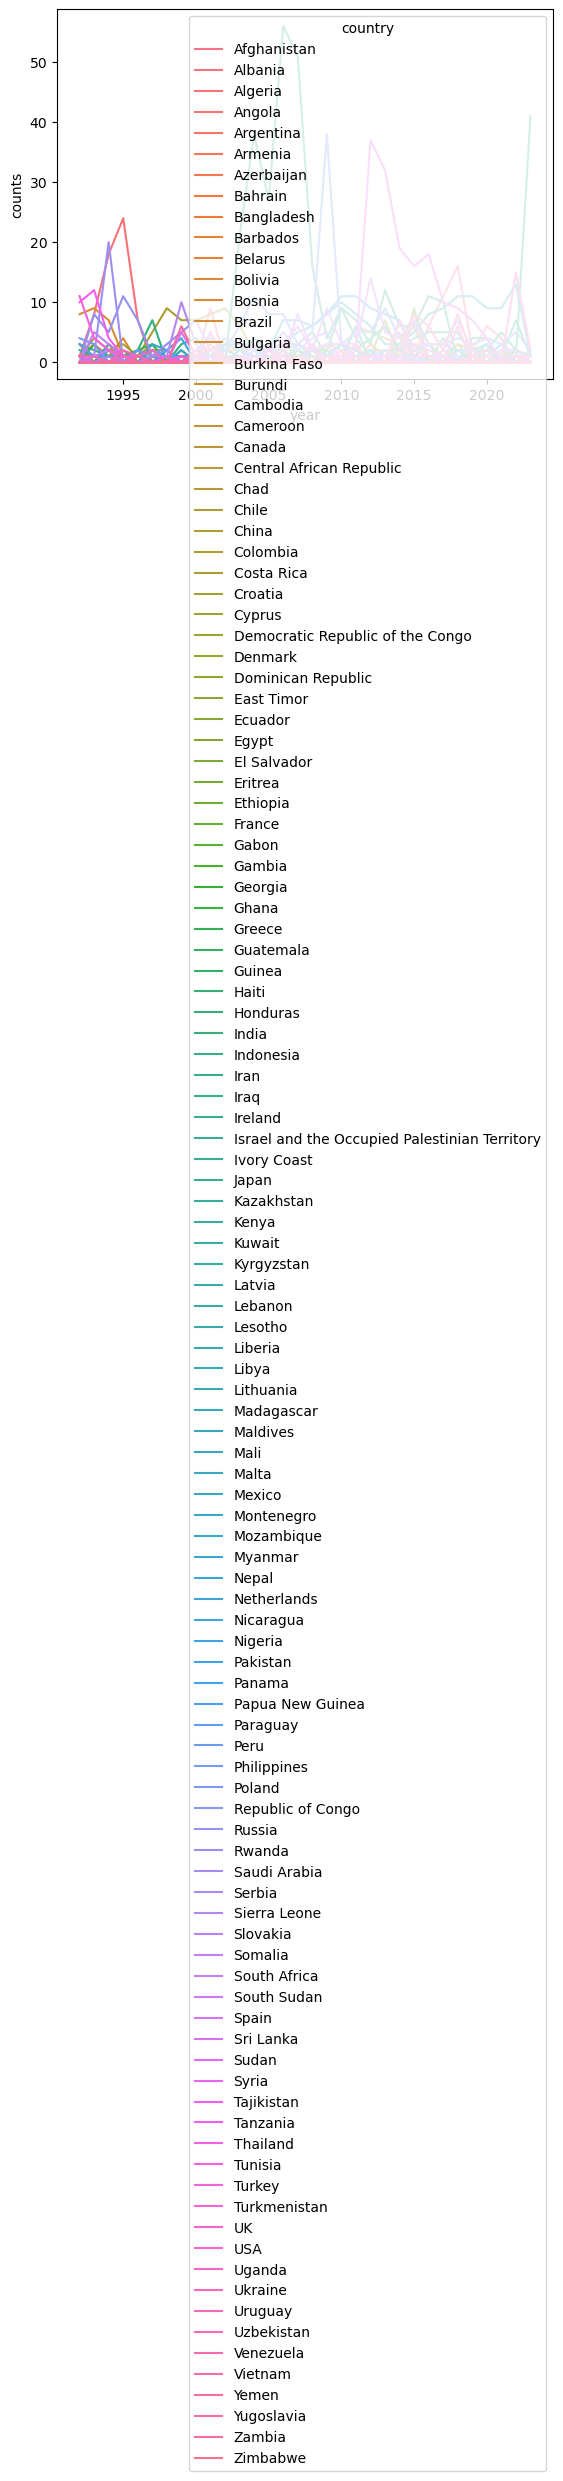

In [ ]:
sns.lineplot(data=result_df, x="year", y="counts", hue="country")


In [ ]:
result_df.to_csv('../data/linechart_journalist.csv')